In [158]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.tsa.stattools as sts 
import statsmodels.graphics.tsaplots as sgt 


from math import sqrt
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set()

## Loading the data

In [2]:
raw_csv_data = pd.read_csv('./3_1_index2018/Index2018.csv')

In [3]:
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


## Closing prices of four market indexes. 

### The numbers following the name indicates the number of companies included in the portofolio. 

### `spx` : S&P 500  (USA) 
### `dax` : DAX 30 (GERMANY)
### `ftse` : FTSE 100 (LONDON)
### `nikkei` : NIKKEI 225 (JAPAN)

## Exploratory data analysis. 

In [5]:
df_comp.size

31345

In [6]:
df_comp.shape

(6269, 5)

In [7]:
df_comp.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [8]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


## The values for _spx_ and _nikkei_ are smaller and bigger respectively compared to _dax_ and _ftse_.

In [9]:
df_comp.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [10]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Ploting the data. 

### S&P prices.

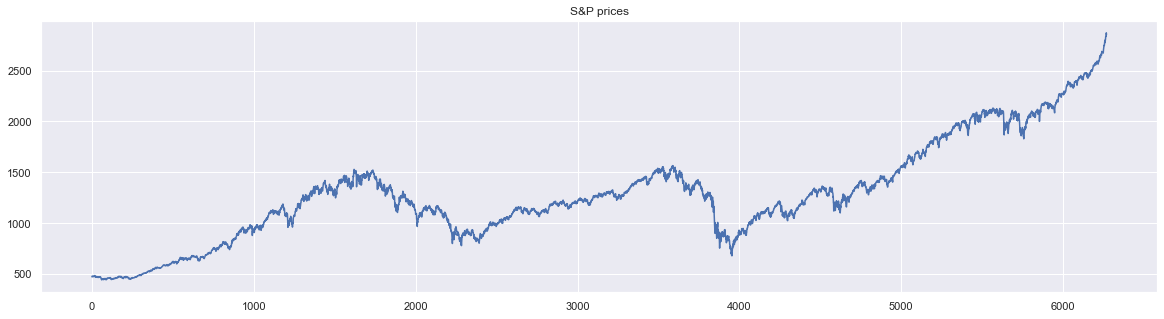

In [11]:
df_comp.spx.plot(figsize = (20,5),title = 'S&P prices')
plt.show()

### FTSE 100 prices. 

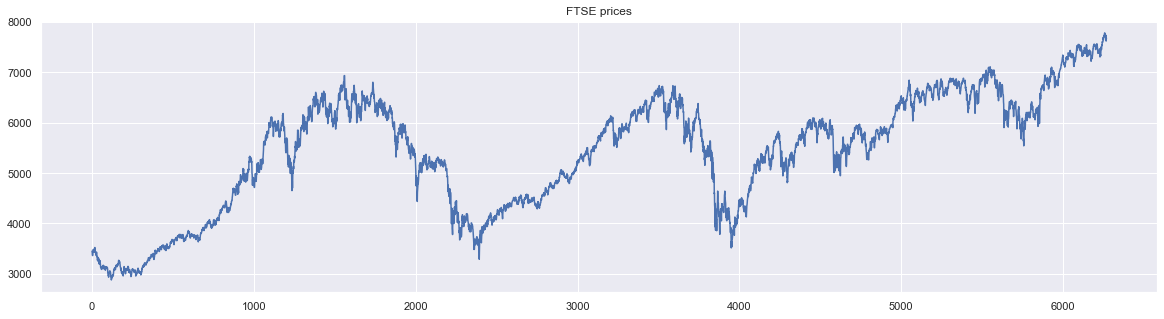

In [12]:
df_comp.ftse.plot(figsize = (20,5),title = 'FTSE prices')
plt.show()

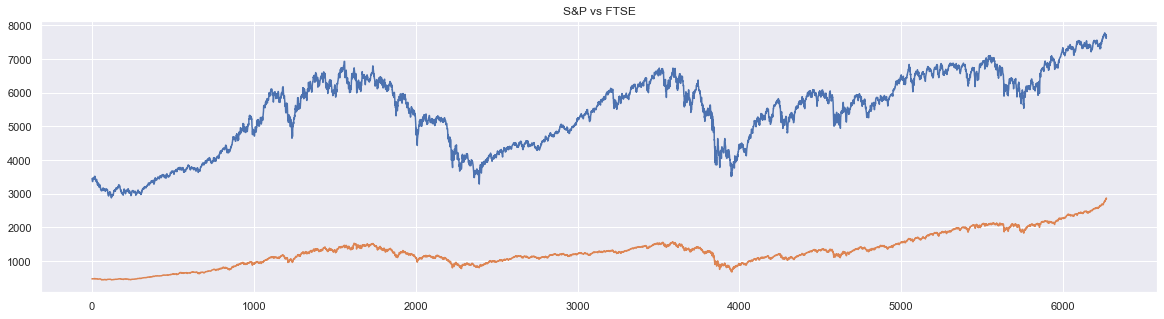

In [13]:
df_comp.ftse.plot(figsize = (20,5),title = 'FTSE prices')
df_comp.spx.plot(figsize = (20,5),title = 'S&P prices')
plt.title('S&P vs FTSE')
plt.show()

## Based on the graph  S&P is flattern  which suggest that is more stable. Buyt this is due to its magnituded. 

## If we want to see the density of the data and which are the values that are more likely to occur we can use the quartile quartile plot. QQPLOT. 

## Quantile. Quantile Plot: used to determine whether a dataset is distributed in a certain way. 

## It usually showcases how the data fits a Normal distribution. 

In [14]:
import scipy.stats
import pylab

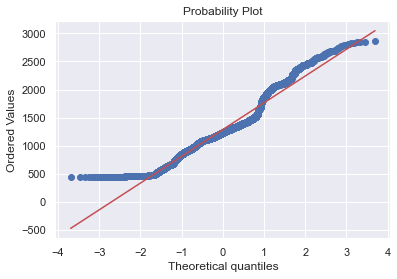

In [15]:
scipy.stats.probplot(df_comp.spx,plot=pylab)# first parameter is the series we want to test the second one is the way we want to express the plot. 
pylab.show()

## This plot takes all the values a variable can take and arranges them in accending order. 

## y : price , x: theoretical quantiles: How many standard deviations away from the mean these values are. 

## The red line indicates the distribution that the values must follow, a normal distribution. However, there are a lot of values refering to 500 so this data is not normally distributed. This is common on time series data.


## **Feature engineering**. 

In [16]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [17]:
df_comp.date.describe()

count           6269
unique          6269
top       03/11/2014
freq               1
Name: date, dtype: object

In [18]:
df_comp['date']=pd.to_datetime(df_comp.date,dayfirst=True) # this method assumes we are plugging in a string in a mm/dd/yyyy  but our data is dd/mm/yyyy


In [19]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [20]:
df_comp.date.describe()

<ipython-input-20-68f1cb45f47c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting the date column as the new index. 

In [21]:
df_comp.set_index('date',inplace=True)

In [22]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the frequency. 

In [23]:
df_comp = df_comp.asfreq('d')# for yearly data we use 'a for annualy

# We can state the frequency of the data for  hourly, daily weekly, monthly an so on. 



In [24]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


## Two new periods which have nan values.

## The data is recorded for week days so we are not interested in weekend days or holidays.

## We can ommit adding saturdays and sundays 

In [25]:
df_comp = df_comp.asfreq('b') # b states for bussines days 

In [26]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling missing values in the dataset. 

In [27]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

## Filling the missing values with the mean is innapropiate because we have underlying time variant patterns in the data.

In [28]:
df_comp.spx = df_comp.spx.fillna(method='ffill') # front fill, it used the previous value 

In [29]:
df_comp.ftse = df_comp.ftse.fillna(method='bfill') # back fill, it used the next value 

In [30]:
df_comp.dax = df_comp.dax.fillna(method='ffill')
df_comp.nikkei = df_comp.nikkei.fillna(method = 'bfill')

In [31]:
df_comp.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplifying the Dataset. 

In [32]:
df_comp['market_value'] = df_comp.spx

In [33]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.690398,14597.597179,1288.642547
std,487.868210,2755.563853,1145.568370,4043.683038,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.260000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7445.560000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [34]:
df_comp.drop(['spx','ftse','nikkei','dax'],axis=1,inplace=True)

In [35]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## Splitting the data. 

## Train and test.  We want to compare the predictions with actual values. 

In [36]:
size = int(len(df_comp)*0.8) # 80% for training. 

In [37]:
size

5021

In [38]:
df = df_comp.iloc[:size] # train set. 
df_test = df_comp.iloc[size:] # test set. 

In [39]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [40]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## If we want to update the data with more recent values using the yfinance library (optional)

In [41]:
# Importing the necessary package 
import yfinance 
# Ignoring warning messages
import warnings 
warnings.filterwarnings("ignore")

In [42]:
# Using the .download() method to get our data

raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", end = "2019-09-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

# tickers -> The time series we are interested in - (in our case, these are the S&P, FTSE, NIKKEI and DAX)
# start -> The starting date of our data set
# end -> The ending date of our data set (at the time of upload, this is the current date)
# interval -> The distance in time between two recorded observations. Since we're using daily closing prices, we set it equal to "1d", which indicates 1 day. 
# group_by -> The way we want to group the scraped data. Usually we want it to be "ticker", so that we have all the information about a time series in 1 variable.
# auto_adjust -> Automatically adjust the closing prices for each period. 
# treads - > Whether to use threads for mass downloading. 

[*********************100%***********************]  4 of 4 completed


In [43]:
# Creating a back up copy in case we remove/alter elements of the data by mistake
df_comp = raw_data.copy()

In [44]:
# Adding new columns to the data set
df_comp['spx'] = df_comp['^GSPC'].Close
df_comp['dax'] = df_comp['^GDAXI'].Close
df_comp['ftse'] = df_comp['^FTSE'].Close
df_comp['nikkei'] = df_comp['^N225'].Close

In [45]:
df_comp = df_comp.iloc[1:] # Removing the first elements, since we always start 1 period before the first, due to time zone differences of closing prices
del df_comp['^N225']  # Removing the original tickers of the data set
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b') # Setting the frequency of the data
df_comp=df_comp.fillna(method='ffill') # Filling any missing values

In [46]:
print (df_comp.head()) # Displaying the first 5 elements to make sure the data was scraped correctly
print (df_comp.tail()) # Making sure the last day we're including in the series are correct

                   spx          dax         ftse        nikkei
                                                              
Date                                                          
1994-01-10  475.269989  2225.000000  3440.600098  18443.439453
1994-01-11  474.130005  2228.100098  3413.800049  18485.250000
1994-01-12  474.170013  2182.060059  3372.000000  18793.880859
1994-01-13  472.470001  2142.370117  3360.000000  18577.259766
1994-01-14  474.910004  2151.050049  3400.600098  18973.699219
                    spx           dax         ftse        nikkei
                                                                
Date                                                            
2019-09-23  2991.780029  12342.330078  7326.100098  22079.089844
2019-09-24  2966.600098  12307.150391  7291.399902  22098.839844
2019-09-25  2984.870117  12234.179688  7290.000000  22020.150391
2019-09-26  2977.620117  12288.540039  7351.100098  22048.240234
2019-09-27  2977.620117  12288.540039  73

## **WORKING WITH TIME SERIES IN PYTHON**

## White noise. 

### White noise is a special type of time-series where the data doesn't follow a pattern. 

### It has a constant mean, a constant variance and no autocorrelation in any period.

### No autocorrelation:  there is no relation with the past and the future. 

### White noise is only a sequence of random data where every value has a time period associated with it. 







In [47]:
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [48]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [49]:
wn = np.random.normal(loc = df.market_value.mean(),scale = df.market_value.std(),size = len(df))

In [50]:
df['wn'] = wn

In [51]:
df.head()

,market_value,wn
date,,
1994-01-07,469.90,1176.189962
1994-01-10,475.27,1307.604711
1994-01-11,474.13,1469.663533
1994-01-12,474.17,1207.369302
1994-01-13,472.47,936.894085


In [52]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1095.396343
std,292.559287,294.616199
min,438.920000,48.327912
25%,914.620000,892.018637
50%,1144.650000,1091.296619
75%,1316.280729,1296.291734
max,1570.252238,2103.770262


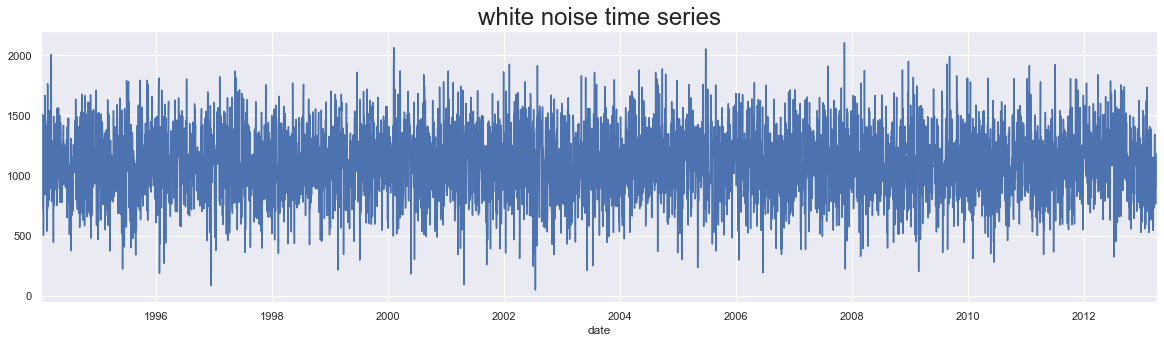

In [53]:
df.wn.plot(figsize = (20,5))
plt.title('white noise time series',size = 24)
plt.show()

## Must of the values are near to its mean. 

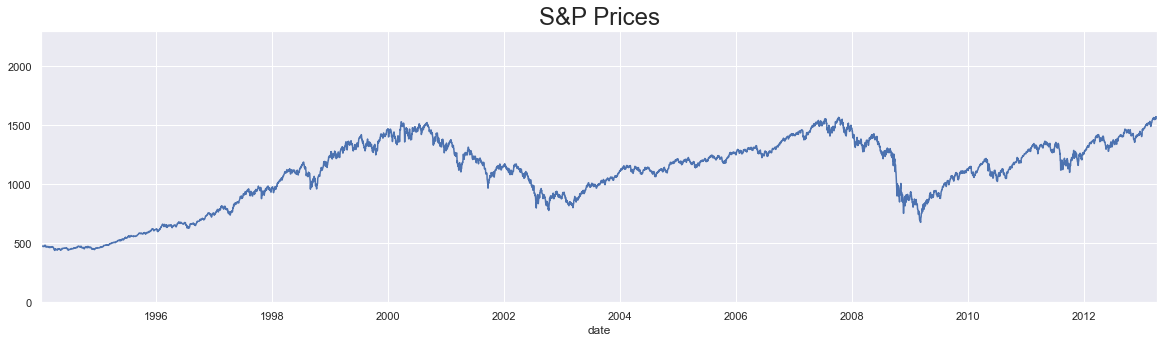

In [54]:
df.market_value.plot(figsize = (20,5))
plt.title('S&P Prices', size = 24)
plt.ylim(0,2300)
plt.show()

## **Random walk**. 

###  The values tend to persist over time and the differences between periods are simply white noise. 

### Prices: $P_{t}$ , residuals $\epsilon_{t}$ 

### We assume the residuals  $\epsilon_{t}$  are white noise they are arbitrary and cannot be predicted. 

### This suggest that the best way to preddict prices of today are the prices from yesterday. 

### $P_{t} = P_{t-1} + \epsilon_{t}$



 

In [55]:
rw = pd.read_csv('./5_2_randwalk-csv/RandWalk.csv')

In [56]:
rw.date = pd.to_datetime(rw.date ,dayfirst= True)
rw.set_index('date',inplace=True)
rw = rw.asfreq('b')


In [57]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [58]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [59]:
df['rw'] = rw.price

In [60]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1176.189962,1122.139662
1994-01-10,475.27,1307.604711,1080.347860
1994-01-11,474.13,1469.663533,1082.095245
1994-01-12,474.17,1207.369302,1083.639265
1994-01-13,472.47,936.894085,1067.146255


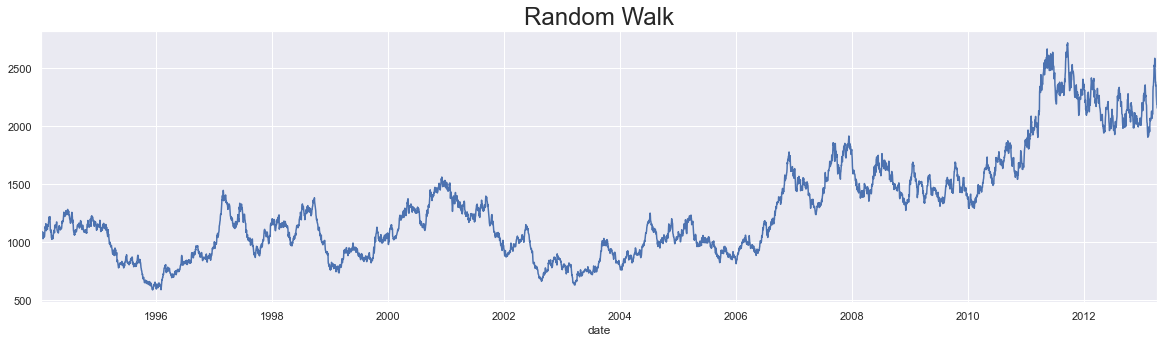

In [61]:
df.rw.plot(figsize = (20,5))
plt.title('Random Walk' , size = 24)
plt.show()

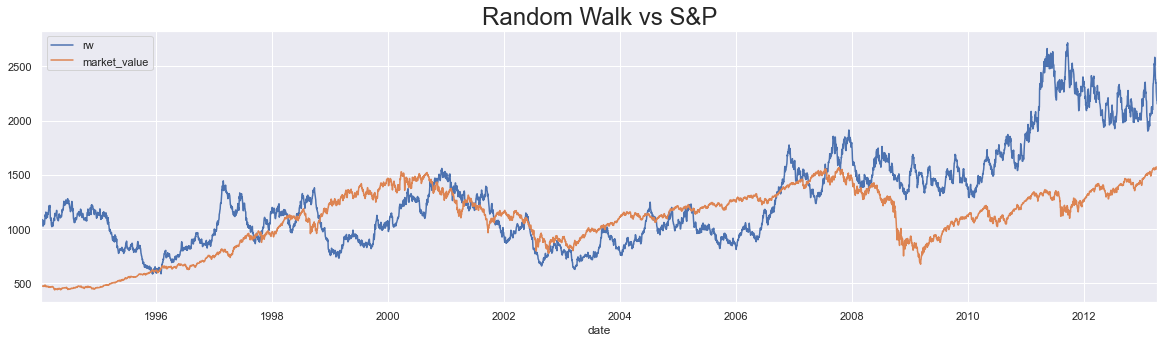

In [62]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title('Random Walk vs S&P' , size = 24)
plt.legend()
plt.show()

## Market efficiency measures the level of difficulty in forecasting correct future values. 

## Arbitrage opportunities: investors buy and sell commodities and make a safe profit while the price adjusts. 

## **Stationarity**. 

###  Taking different samples of data with the same size should have identical convariance. This is called weak-form stationarity or covariance stationarity. 

### This comes with different assumptions such as : 

###  Have a constant mean 

### Have a constant variance 

### Have a consistent covariance between periods which are distanced equaly from one another. Cov($x_{1},x_{4}$) = Cov($x_{3},x_{6}$) 

### White noise satisfys the assumptions of covariance stationary.


### Strict stationarity : samples of identical size must have identical distributions. But this is very rare in the real world. 

 

## Checking for stationarity. 

### This is a hypotesis test which states the following. 

### $H_{0}$ : non stationarity  $\varphi_{1} < 1 $ : 1 lag autocorrelation coefficient is lower than 1.

### $H_{1}$ : non stationarity  $\varphi_{1} = 1$ : 1 lag autocorrelation coefficient is equal to 1.

### If the statistic is lower than the critical value the data came from a stationary process and we reject the null hypotesis. 



In [63]:
sts.adfuller(df.market_value)

(-1.7369847452352452,
 0.41216456967706144,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

### First output :the T statistic (-1.7369). 

### Second output : the p value (0.4121) asociated with the statistic. There is a 40% chance of non rejecting the null hypotesis.  

### Third output:(18) number of lags used in the regression. So there is some autocorrelation from 18 periods. 

### Fourth output : (5002) number of observations. 

### Fifth output : 1%, 5% and 10% are the corresponding critical values from the dicker fully table. These are the level of significance. 

### The T statistic is greater than all the critical values so there is no statistical evidence that confirms that the data is stationary, so we cant reject the null hypothesis. 

### Six output: (39904.880) estimates the maximize information criteria, so there is some apparent autocorrelation. The lower the values, the easier to make predictions for the future. 


In [64]:
sts.adfuller(df.wn)

(-70.97539582347126,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70873.51281326059)

## Since white noise is a stationary process we get a low p-value and since we dont have autocorrelation we dont have any lags involved in the regression. 

In [65]:
sts.adfuller(df.rw)

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Random walk cames from a non stationary process. This results that covariances of two intervals with same sizes are rarely equal.

## Each days prices may go up or down but the starting possition is always different. There are intervals with ups and down prices and some intervals with constant increase. 

## **Seasonality**

### Some trends will apperar on a cyclical basis.

### It can be splitted in 3 effects 

#### Trend: explains the pattern in the data 

#### Seasonal : explains the cyclical effects due to seasonality 

#### Residual : error of prediction  difference from the actual and predict data. 


### **Naive decomposition**


#### We expect a linear relation within the 3 parts  and the observed time series. 

#### Additive : for any time period the observed value is the sum of the trend + seasonal + residual for that period. 

#### Additive : for any time period the observed value is the multiplication of the trend *seasonal * residual for that period. 




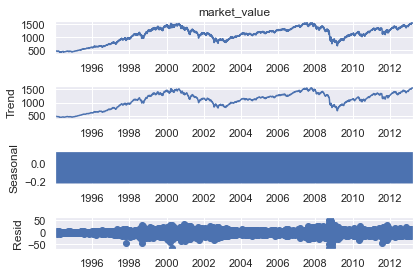

In [66]:
s_dec_additive = seasonal_decompose(df.market_value,model = 'additive')
s_dec_additive.plot()
plt.show()

##  The trend closely resemble the observed series. This is because the decomposition function uses the previous period values as a trend-setter. 

## The seasonal plot looks like a rectangle. This is because the values are constantly oscilating 0.1 -0.2 and the figure size is small. There is no concrete cyclical pattern using Naive decomposition.  No seasonality of the data. 

## The residuals are the errors of our models estimates. They are the difference between the true values and prediction. 

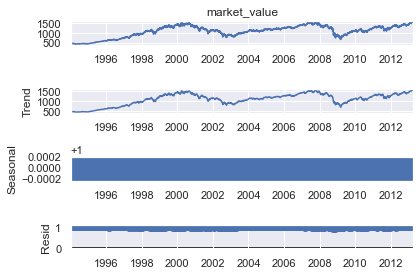

In [67]:
s_dec_multi = seasonal_decompose(df.market_value,model = 'multiplicative')
s_dec_multi.plot()
plt.show()

## Correlation measures the similarity in the change of values of two series. 

## Autocorrelation is the correlation between the values of the time series and a lagged version of itself. 

## **AUTOCORRELATION FUNCTION** (ACF)


### It computes the autocorrelation value of the lags we are interested. 

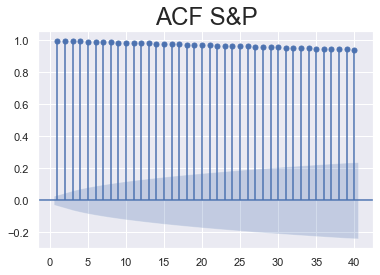

In [68]:
sgt.plot_acf(df.market_value,lags = 40,zero = False) # zero to false because we dont want to take in count current period value in the function the correlation with your self will always be 1. 
plt.title('ACF S&P',size = 24)
plt.show()

## Values in the x axes represents lags. 

## Values in the y axes represents possible values for the autocorrelation coefficients denoted by $\varphi$. It can take values from -1 to 1 

##  The first line represents autocorrelation with one time period ago. The second one represents the coefficient of the autocorrelation with two periods ago. 

## The shaded are represents significance. All the values are situaded outside this shaded region and are greater than zero. This suggest the existence of autocorrelation. There is a time dependency on the data. The prices even a month back can be good estimators. 


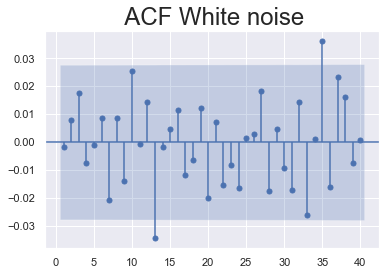

In [69]:
sgt.plot_acf(df.wn,lags = 40,zero = False) # zero to false because we dont want to take in count current period value in the function the correlation with your self will always be 1. 
plt.title(' ACF White noise',size = 24)
plt.show()

## All the coeficients fall in the blue area so there is no autocorrelation for any lag. 

## **Partial autocorrelation**. 

## The 3rd lag can affect the second and the first one with respect the current one. If we want to ommit those interactions and measure the direct relationship between  the current lag and the 3rd without taking in count those interactions we can use the Partial autocorrelation function. 

## PACF measures the direct influence of the lag version $x_{t-2}$ with the current one $x_{t}$. It cancel out the indirect influence of other periods between them. $x_{t-2}$ -- $x_{t-1}$-- $x_{t}$  

## The ACF measures the accumulated effects past lags have on the current value as well as the direct effects, while the PACF measures only the direct effects.




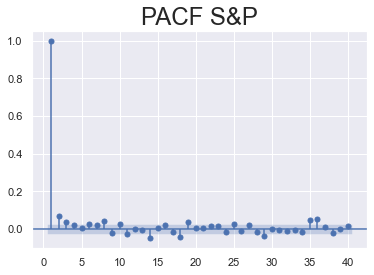

In [70]:
sgt.plot_pacf(df.market_value,lags = 40,zero = False,method= 'ols')
plt.title('PACF S&P',size = 24)
plt.show()

## The ninth (9) lag has a negative coefficient so beyond that lag there seems to be no autocorrelation. All other coefficients falls in the blue region so they are not significant. Only the first lag seems to be significant. So we would include it in our model. 

## Since our data is in business days there is a cyclical change every month, more specifically every 22 days. So the values a month ago, negatively affect the values today. 

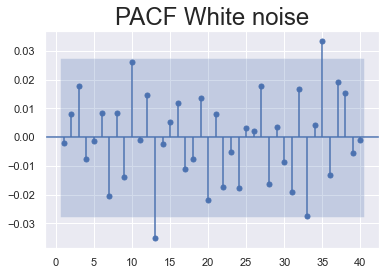

In [71]:
sgt.plot_pacf(df.wn,lags = 40,zero = False,method= 'ols')
plt.title('PACF White noise',size = 24)
plt.show()

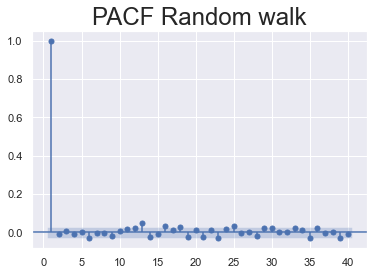

In [72]:
sgt.plot_pacf(df.rw,lags = 40,zero = False,method= 'ols')
plt.title('PACF Random walk',size = 24)
plt.show()

# **MODELS**

## To choose the best model we need the one who has higher log-likelihood and lower information criteria. 

## 1) We need significant coefficients. Those who are significant different from zero (0). 

## 2) Model to be parsimonious simple. 

### To determine if the predictions are significantly better, we introduce an statistical test called the log-likelihood ratio test.

### The llrt can be used only with models with different degrees of freedom. 

### So we would make use of the information criteria of the models because they have the same total number of lags. 

### The lower the coefficient the less data the model requeries to make accurate predictions. 

### AIC and BIC (they must be low)

## 3) If the model fits well, there should be no trend the model account for. So the residuals of the models should resemble white noise this means that $\varepsilon_{t} \sim wn(\mu ,\sigma ^{2})$. This accounts that there are no patterns we have missed. 








## **1) THE AR (Auto Regressive) MODEL**. 

## This is a linear model which takes in count previous values to predict the current ones. 

## $X_{t}$ = C + $\varphi_{1} X_{t-1} + \varepsilon_{t}$

## $X_{t-1}$ : values of x during the previous period. If t is in a weekly frequency, t-1 would represent the value of the sales from the previous week. 

## $\varphi_{1}$ : Any numeric constant by which we multiply the lagged variable. It states how much of the lagged value would count to predict the current one. This is the autocorrelation coefficient. It takes values from 1 and -1. 

## $\varepsilon_{t}$ : The residual which is the difference between our prediction for period t and the correct value. 







## The AR(1) model. 

In [73]:
model_ar = ARMA(df.market_value, order=(1,0)) # 1 states for 1 lag is considered to the model and 0 implies that we are not taking any of the residual values into consideration. 

In [74]:
results_ar = model_ar.fit()

In [75]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Thu, 04 Nov 2021   AIC                          40200.776
Time:                        13:09:36   BIC                          40220.340
Sample:                    01-07-1994   HQIC                         40207.631
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1060.4197    228.350      4.644      0.000     612.861    1507.978
ar.L1.market_value     0.9994      0.001   1911.816      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

## in the row which say const this indicates the value for the constant C in the AR model. 

## The row that says ar.L1.market_value is the value for $\varphi_{1}$ which is 0.994. This is the autocorrelation coefficient for the first lag $x_{t-1}$. 

## The other values are the standard error which states how far away, on average, the model's predictions are from the true values.

## Next we have the statistic. 

## The p value which is zero. This indicates that the coefficients are significant. 

## And lastly we have critical values for the 95% confidence interval. If zero is not a part of it we can confirm the coefficients are significant. 

## Higher-Lag AR Models. 

In [76]:
model_ar_2 = ARMA(df.market_value, order=(2,0)) # 1 states for 1 lag is considered to the model and 0 implies that we are not taking any of the residual values into consideration. 
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.280
Method:                       css-mle   S.D. of innovations             13.206
Date:                Thu, 04 Nov 2021   AIC                          40178.559
Time:                        13:09:40   BIC                          40204.645
Sample:                    01-07-1994   HQIC                         40187.700
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1054.2766    249.296      4.229      0.000     565.665    1542.889
ar.L1.market_value     0.9301      0.014     68.023      0.000       0.903       0.957
ar.L2.market_value     0.0694      0.014      5.071      0.000       0.043       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.4080           +0.0000j           14.4080            0.5000
-----------------------------------------------------------------------------
"""

In [77]:
model_ar_3 = ARMA(df.market_value, order=(3,0)) # 1 states for 1 lag is considered to the model and 0 implies that we are not taking any of the residual values into consideration. 
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Thu, 04 Nov 2021   AIC                          40174.694
Time:                        13:09:41   BIC                          40207.301
Sample:                    01-07-1994   HQIC                         40186.120
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1054.9114    259.313      4.068      0.000     546.668    1563.155
ar.L1.market_value     0.9277      0.014     68.258      0.000       0.901       0.954
ar.L2.market_value     0.0376      0.019      1.989      0.047       0.001       0.075
ar.L3.market_value     0.0342      0.014      2.423      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0507           -5.3049j            5.4080           -0.2811
AR.3           -1.0507           +5.3049j            5.4080            0.2811
-----------------------------------------------------------------------------
"""

In [78]:
model_ar_4 = ARMA(df.market_value, order=(4,0)) # 1 states for 1 lag is considered to the model and 0 implies that we are not taking any of the residual values into consideration. 
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Thu, 04 Nov 2021   AIC                          40174.511
Time:                        13:09:43   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1058.2230    265.308      3.989      0.000     538.230    1578.217
ar.L1.market_value     0.9270      0.014     68.576      0.000       0.900       0.953
ar.L2.market_value     0.0368      0.019      1.952      0.051      -0.000       0.074
ar.L3.market_value     0.0148      0.019      0.772      0.440      -0.023       0.053
ar.L4.market_value     0.0209      0.014      1.478      0.140      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9302           -0.0000j            3.9302           -0.5000
AR.3            1.1089           -3.3116j            3.4924           -0.1986
AR.4            1.1089           +3.3116j            3.4924            0.1986
-----------------------------------------------------------------------------
"""

In [79]:
def LLR_test(mod_1,mod_2,DF=1):
    """ Calculates the Log Likelihood ratio  between two models.  

    Args:
        mod_1 : model 1 
        mod_2 : model 2 
        DF (int, optional): degrees of freedom. Since we ususally only compare models with a single difference we set this value to 1.
        
    Returns:
        p (float) : pvalue for the loglikehood test. 
    """
    
    
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3) #  p value. 
    return p
    

In [80]:
LLR_test(model_ar_2,model_ar_3)

0.015

## The p value is lower than 0.05 so it is significant, therefore we should opt for a more complicated model. eg with more lags. 

In [81]:
model_ar_7 = ARMA(df.market_value, order=(7,0)) # 7 states for 7 lag is considered to the model and 0 implies that we are not taking any of the residual values into consideration. 
results_ar_7 = model_ar_7.fit()
results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -20078.387
Method:                       css-mle   S.D. of innovations             13.187
Date:                Thu, 04 Nov 2021   AIC                          40174.774
Time:                        13:09:50   BIC                          40233.466
Sample:                    01-07-1994   HQIC                         40195.340
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1044.1700    284.391      3.672      0.000     486.773    1601.567
ar.L1.market_value     0.9261      0.013     69.935      0.000       0.900       0.952
ar.L2.market_value     0.0367      0.019      1.966      0.049       0.000       0.073
ar.L3.market_value     0.0139      0.019      0.724      0.469      -0.024       0.052
ar.L4.market_value     0.0138      0.019      0.719      0.472      -0.024       0.052
ar.L5.market_value    -0.0172      0.019     -0.895      0.371      -0.055       0.020
ar.L6.market_value     0.0037      0.019      0.191      0.849      -0.034       0.041
ar.L7.market_value     0.0225      0.014      1.592      0.111      -0.005       0.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           -0.0000j            1.0004           -0.0000
AR.2            1.4420           -1.0292j            1.7716           -0.0987
AR.3            1.4420           +1.0292j            1.7716            0.0987
AR.4           -0.1855           -1.8366j            1.8459           -0.2660
AR.5           -0.1855           +1.8366j            1.8459            0.2660
AR.6           -1.8385           -0.8843j            2.0401           -0.4286
AR.7           -1.8385           +0.8843j            2.0401            0.4286
-----------------------------------------------------------------------------
"""

In [82]:
print("LLR test:"+  str(LLR_test(model_ar,model_ar_7,DF = 6)))

LLR test:0.0


## We need to convert the data to stationary. 

## In finance is better to use returns instead of prices when measuring financial indices.

## Returns expressed the % change between the values for two consecutive periods. 

## Positive return denotes an increase in the price and negative denotes a declaine. 

## Return = ($p_{t} -p_{t-1}) *100/p_{t-1}$



In [83]:
df['returns'] = df.market_value.pct_change(1).mul(100)# percentage change with a distance of 1 between time periods.
df = df.iloc[1:]

In [84]:
sts.adfuller(df.returns)

(-17.03445719098118,
 8.280537020317061e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345134)

## ACF AND PACF for returns. 

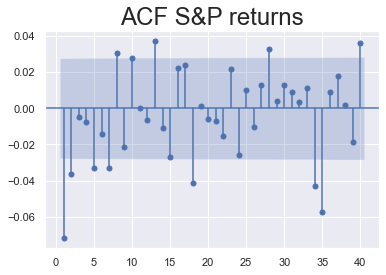

In [85]:
sgt.plot_acf(df.returns,lags=40,zero=False)
plt.title('ACF S&P returns', size = 24)
plt.show()

## Consecutive values move in different directions

## Since the relationship is negative we can interpret it as some form of natural adjustment ocurring in the market 

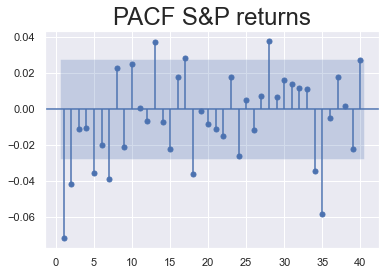

In [86]:
sgt.plot_pacf(df.returns,lags=40,zero=False,method=('ols'))
plt.title('PACF S&P returns', size = 24)
plt.show()

## The prices of today moves in an opposite direction from prices yesterday. We tend to get prices increases following prices decreases. 

In [87]:
model_ret_ar_1 = ARMA(df.returns,order=(1,0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -8067.541
Method:                       css-mle   S.D. of innovations              1.207
Date:                Thu, 04 Nov 2021   AIC                          16141.081
Time:                        13:09:54   BIC                          16160.645
Sample:                    01-10-1994   HQIC                         16147.937
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.016      1.959      0.050   -1.03e-05       0.062
ar.L1.returns    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

## The more easily yesterdays price is affected by higher lags the more inaccurate its coefficient becomes. 

In [88]:
model_ret_ar_2 = ARMA(df.returns,order=(2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -8063.177
Method:                       css-mle   S.D. of innovations              1.206
Date:                Thu, 04 Nov 2021   AIC                          16134.354
Time:                        13:09:54   BIC                          16160.439
Sample:                    01-10-1994   HQIC                         16143.494
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.015      2.042      0.041       0.001       0.061
ar.L1.returns    -0.0749      0.014     -5.312      0.000      -0.103      -0.047
ar.L2.returns    -0.0417      0.014     -2.955      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8154j            4.8986           -0.2794
AR.2           -0.8987           +4.8154j            4.8986            0.2794
-----------------------------------------------------------------------------
"""

In [89]:
print("LLR test:"+  str(LLR_test(model_ret_ar_1,model_ret_ar_2,DF = 1)))

LLR test:0.003


In [90]:
model_ret_ar_3 = ARMA(df.returns,order=(3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -8062.879
Method:                       css-mle   S.D. of innovations              1.206
Date:                Thu, 04 Nov 2021   AIC                          16135.758
Time:                        13:09:55   BIC                          16168.364
Sample:                    01-10-1994   HQIC                         16147.184
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.015      2.065      0.039       0.002       0.061
ar.L1.returns    -0.0754      0.014     -5.339      0.000      -0.103      -0.048
ar.L2.returns    -0.0425      0.014     -3.005      0.003      -0.070      -0.015
ar.L3.returns    -0.0109      0.014     -0.772      0.440      -0.039       0.017
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8476           -3.9608j            4.0505           -0.2164
AR.2            0.8476           +3.9608j            4.0505            0.2164
AR.3           -5.5964           -0.0000j            5.5964           -0.5000
-----------------------------------------------------------------------------
"""

In [91]:
print("LLR test:"+  str(LLR_test(model_ret_ar_2,model_ret_ar_3,DF = 1)))

LLR test:0.44


## We opt for using the AR(2) in returns. 

## **Normalize values**. 

## When normalizing in timeseries we map every value from the sample space to the percentage of the first value of the set. This resulting series is much easier to compare with other time series. e.g. S&P vs Nikkei. 

## When normalizing two time series we can compare how they perform relative to one another.  

## An increase in S&P of 100 has a bigger impact than an increase in 100 in Nikkei. This is because prices, and therefore returns for Nikkei are greater. So when normalizing the values with respect the first one respectively  we can compare this two series better. 

In [92]:
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)


In [93]:
sts.adfuller(df.norm)

(-1.739687107737129,
 0.41078913382078697,
 18,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 24351.278699350325)

## The data is not stationarity. 

In [94]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

In [95]:
sts.adfuller(df.norm_ret)

(-17.03445719098113,
 8.280537020317773e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 60636.5822032878)

## The data is stationary, normalizing does not affect stationarity. 

## Testing with the normalized returns. 

In [96]:
model_norm_ret_ar_1 = ARMA(df.norm_ret,order=(1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -30515.434
Method:                       css-mle   S.D. of innovations            105.618
Date:                Thu, 04 Nov 2021   AIC                          61036.869
Time:                        13:09:55   BIC                          61056.432
Sample:                    01-10-1994   HQIC                         61043.724
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7244      1.391      1.959      0.050      -0.001       5.450
ar.L1.norm_ret    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

In [97]:
model_norm_ret_ar_2 = ARMA(df.norm_ret,order=(2,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -30511.071
Method:                       css-mle   S.D. of innovations            105.527
Date:                Thu, 04 Nov 2021   AIC                          61030.142
Time:                        13:09:55   BIC                          61056.226
Sample:                    01-10-1994   HQIC                         61039.282
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7247      1.334      2.043      0.041       0.110       5.339
ar.L1.norm_ret    -0.0749      0.014     -5.312      0.000      -0.103      -0.047
ar.L2.norm_ret    -0.0417      0.014     -2.955      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8155j            4.8986           -0.2794
AR.2           -0.8987           +4.8155j            4.8986            0.2794
-----------------------------------------------------------------------------
"""

In [98]:
print("LLR test:"+  str(LLR_test(model_norm_ret_ar_1,model_norm_ret_ar_2,DF = 1)))

LLR test:0.003


## Residuals 

### Ideally the residuals must follow a white noise process. Also they must be stationary. 

In [99]:
df['res_price'] = results_ar_7.resid

In [100]:
df.res_price.mean()

0.2791281535706783

In [101]:
df.res_price.var() # the residuals are far away from the mean. This is because AR models perform bad on non stationary data.

173.8272604717965

In [102]:
sts.adfuller(df.res_price)

(-16.21343418082164,
 3.96476001494728e-29,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39896.895907596714)

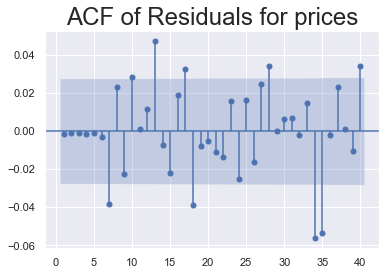

In [103]:
sgt.plot_acf(df.res_price,zero = False,lags = 40)
plt.title('ACF of Residuals for prices', size = 24)
plt.show()

## Most of the coefficients fall in the blue region which said that they are not significant and are close to 0. 

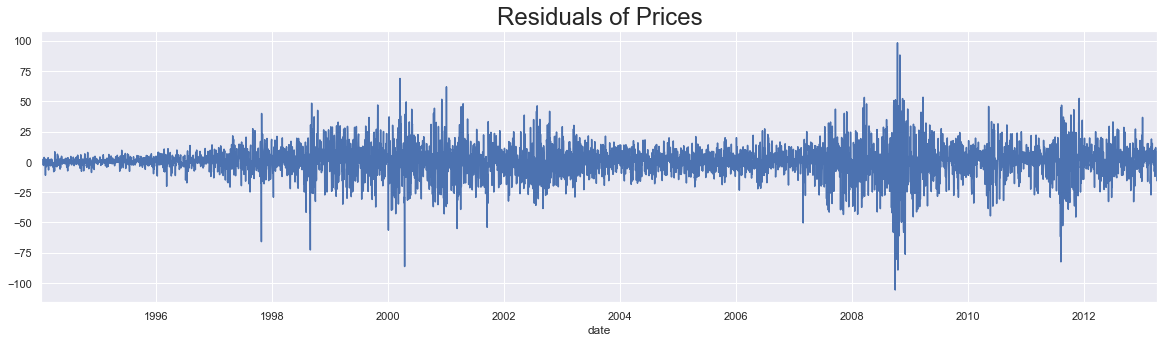

In [104]:
df.res_price[1:].plot(figsize = (20,5))
plt.title('Residuals of Prices', size = 24)
plt.show()

## There is a high point during 2008 this is because of the recesion for those years. 

## So, Why do we plot the ACF and/or PACF of the residuals from a fitted model?

### If the residuals are non-random (not White Noise), then there is a pattern that needs to be accounted for.

## **Unpredictable events**. 

## We need to account unnexpected shocks. There are models that can take in count those situations. 

## We need a self correcting model. It takes in count past residuals. These models adjust to unexpected shocks more quickly because the predictions are corrected inmediately following a big error. 

## The more erros we accounted the better the model we get. This results in a more adapted model. 

## This models are called Moving Average model. Because absorving this shocks allows the mean to move accordingly. They perform well on random walk datasets, because they adjust with the error from the previous period. 

## It prevents the model to diverge, which is great for non stationary data. 






# **Moving Average (MA) model**. 

## Q is the letter that references the number of lags used for this model. P is the letter that references the number of lags used for the autoregressive model. 

## $r_{t} = c + \theta_{1} * \varepsilon_{t-1} + \varepsilon_{t}$

### $r_{t}$ : The values of r in the current period. For our case the returns. 


### $\theta_{1}$ : A numeric coefficient for the value associated with the first lag $\varepsilon_{t-1}$. This value should be less than 1 in order to prevent a compounded effect in exploding in magnitude. 

### $\varepsilon_{t-1}$ : Residual of the past period. 


### How do we get the residuals?

### We start from the beggining of the dataset and try to predict each value. Depending of how far we are from the actual value with respect our prediction we obtain a residual. 

### The MA models are based on past periods returns for our case so we rely on the ACF graph. We rely on cummulative effects from past lags. In the AR model we rely on the PACF graph because we consider only direct effects. 

In [105]:
df.head()

,market_value,wn,rw,returns,norm,norm_ret,res_price
date,,,,,,,
1994-01-10,475.27,1307.604711,1080.347860,1.142796,100.000000,100.000000,5.051394
1994-01-11,474.13,1469.663533,1082.095245,-0.239864,99.760136,-20.989187,-1.060769
1994-01-12,474.17,1207.369302,1083.639265,0.008437,99.768553,0.738233,-0.142397
1994-01-13,472.47,936.894085,1067.146255,-0.358521,99.410861,-31.372275,-1.903917
1994-01-14,474.91,1507.303020,1080.129720,0.516435,99.924254,45.190459,2.049990


## ACF for returns in the MA model. 

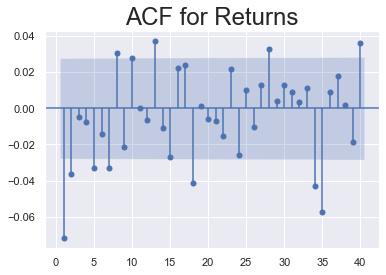

In [106]:
sgt.plot_acf(df.returns,zero = False, lags = 40)
plt.title('ACF for Returns', size = 24)
plt.show()

## Moving avergae model 

In [107]:
model_ret_ma_1= ARMA(df.returns,order = (0,1)) # First argument for the order is the AR, the second argument is MA and the third argument the differences. 
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -8066.419
Method:                       css-mle   S.D. of innovations              1.207
Date:                Thu, 04 Nov 2021   AIC                          16138.839
Time:                        13:09:57   BIC                          16158.402
Sample:                    01-10-1994   HQIC                         16145.694
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.016      1.983      0.047       0.000       0.062
ma.L1.returns    -0.0781      0.015     -5.337      0.000      -0.107      -0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           12.7989           +0.0000j           12.7989            0.0000
-----------------------------------------------------------------------------
"""

In [108]:
model_ret_ma_2= ARMA(df.returns,order = (0,2)) # First argument for the order is the AR, the second argument is MA and the third argument the differences. 
results_ret_ma_2 = model_ret_ma_2.fit()
results_ret_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -8062.759
Method:                       css-mle   S.D. of innovations              1.206
Date:                Thu, 04 Nov 2021   AIC                          16133.518
Time:                        13:09:57   BIC                          16159.603
Sample:                    01-10-1994   HQIC                         16142.659
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.015      2.067      0.039       0.002       0.061
ma.L1.returns    -0.0759      0.014     -5.383      0.000      -0.104      -0.048
ma.L2.returns    -0.0389      0.014     -2.707      0.007      -0.067      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.1885           +0.0000j            4.1885            0.0000
MA.2           -6.1417           +0.0000j            6.1417            0.5000
-----------------------------------------------------------------------------
"""

In [109]:
print("LLR test:"+  str(LLR_test(model_ret_ma_1,model_ret_ma_2,DF = 1)))

LLR test:0.007


In [110]:
model_ret_ma_6= ARMA(df.returns,order = (0,6)) # First argument for the order is the AR, the second argument is MA and the third argument the differences. 
results_ret_ma_6 = model_ret_ma_6.fit()
results_ret_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -8057.834
Method:                       css-mle   S.D. of innovations              1.205
Date:                Thu, 04 Nov 2021   AIC                          16131.669
Time:                        13:09:59   BIC                          16183.838
Sample:                    01-10-1994   HQIC                         16149.950
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.014      2.249      0.025       0.004       0.058
ma.L1.returns    -0.0778      0.014     -5.511      0.000      -0.105      -0.050
ma.L2.returns    -0.0391      0.014     -2.752      0.006      -0.067      -0.011
ma.L3.returns    -0.0066      0.014     -0.462      0.644      -0.034       0.021
ma.L4.returns    -0.0113      0.014     -0.824      0.410      -0.038       0.016
ma.L5.returns    -0.0349      0.014     -2.524      0.012      -0.062      -0.008
ma.L6.returns    -0.0159      0.014     -1.122      0.262      -0.044       0.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.6153           -0.0000j            1.6153           -0.0000
MA.2            0.7656           -1.6541j            1.8227           -0.1810
MA.3            0.7656           +1.6541j            1.8227            0.1810
MA.4           -1.3997           -1.6259j            2.1454           -0.3631
MA.5           -1.3997           +1.6259j            2.1454            0.3631
MA.6           -2.5382           -0.0000j            2.5382           -0.5000
-----------------------------------------------------------------------------
"""

In [111]:
model_ret_ma_8= ARMA(df.returns,order = (0,8)) # First argument for the order is the AR, the second argument is MA and the third argument the differences. 
results_ret_ma_8 = model_ret_ma_8.fit()
results_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -8053.403
Method:                       css-mle   S.D. of innovations              1.204
Date:                Thu, 04 Nov 2021   AIC                          16126.805
Time:                        13:10:01   BIC                          16192.017
Sample:                    01-10-1994   HQIC                         16149.656
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.014      2.245      0.025       0.004       0.058
ma.L1.returns    -0.0754      0.014     -5.337      0.000      -0.103      -0.048
ma.L2.returns    -0.0416      0.014     -2.933      0.003      -0.069      -0.014
ma.L3.returns    -0.0055      0.014     -0.385      0.700      -0.033       0.022
ma.L4.returns    -0.0114      0.014     -0.806      0.420      -0.039       0.016
ma.L5.returns    -0.0359      0.014     -2.617      0.009      -0.063      -0.009
ma.L6.returns    -0.0121      0.014     -0.847      0.397      -0.040       0.016
ma.L7.returns    -0.0311      0.014     -2.157      0.031      -0.059      -0.003
ma.L8.returns     0.0293      0.014      2.123      0.034       0.002       0.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3312           -0.6022j            1.4611           -0.4324
MA.2           -1.3312           +0.6022j            1.4611            0.4324
MA.3           -0.5162           -1.4570j            1.5457           -0.3042
MA.4           -0.5162           +1.4570j            1.5457            0.3042
MA.5            0.6927           -1.3374j            1.5062           -0.1739
MA.6            0.6927           +1.3374j            1.5062            0.1739
MA.7            1.6842           -0.3288j            1.7160           -0.0307
MA.8            1.6842           +0.3288j            1.7160            0.0307
-----------------------------------------------------------------------------
"""

## We set degrees of freedom to 2 because we need to estimate the coefficients for 8 variables in the complicated model (MA(8)) 2 motre than the 6 from the simpler model (MA(6))

In [112]:
print("LLR test:"+  str(LLR_test(model_ret_ma_6,model_ret_ma_8,DF = 2)))

LLR test:0.012


## When fitting an MA(Q) model, if the Q-th lag isn't significant in the ACF plot, the Q-th coefficient of the summary table won't be significant as well. 

## The more complicated model performs better than the simplier one. 

In [113]:
df['rest_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [114]:
print("The mean of the residuals is : " + str(round(df.rest_ret_ma_8.mean(),3))+ "\nThe variance of the residuals is :" + str(round(df.rest_ret_ma_8.var(),3)))

The mean of the residuals is : -0.0
The variance of the residuals is :1.449


In [115]:
standar_dev_res = round(sqrt(df.rest_ret_ma_8.var()),3)

In [116]:
print("The standard deviation of the residuals is : " + str(standar_dev_res))

The standard deviation of the residuals is : 1.204


In [117]:
away_from_mean_interval = [-3*1.204, 3*1.204]

In [118]:
away_from_mean_interval

[-3.612, 3.612]

## Gaussian White-Noise implies normality. So in this case we can use the 68, 95, 99.7 rule. This dictates what part of the data is spread within 1,2 and 3 standard deviations away from the mean in either direction. 

## Thus we expect the most return residuals will be between (-3.612 and 3.612). This means that worst case escenario, we can be upto 7% off when predicting the return for market index. This is no ideal.



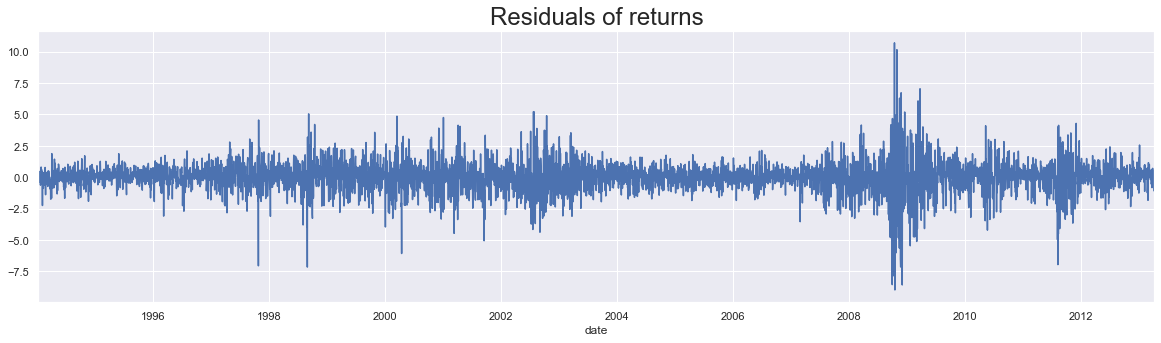

In [119]:
df.rest_ret_ma_8[1:].plot(figsize = (20,5))
plt.title('Residuals of returns',size = 24)
plt.show()

In [120]:
sts.adfuller(df.rest_ret_ma_8[1:])

(-70.85682973906593,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 16026.273153517493)

## P value is 0 so the data is stationary. 

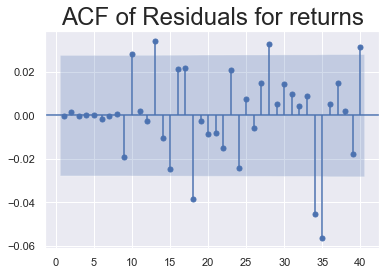

In [121]:
sgt.plot_acf(df.rest_ret_ma_8[1:],zero = False,lags=40)
plt.title('ACF of Residuals for returns', size = 24)
plt.show()

## Normalized returns. 

In [122]:
def plot_acf_graph(series, boo, lags):
    """ Function for ploting the acf graph. 

    Args:
        series (pandas series): pandas series object for which we want to obtain the acf graph. 
        boo (boolean): True or False for taking in count the first autocorrelation. 
        lags (int): Number of lags used for the ACF graph. 
    """
    sgt.plot_acf(series[1:], zero = boo ,lags = lags)
    plt.title('ACF graph',size = 24)
    plt.show()

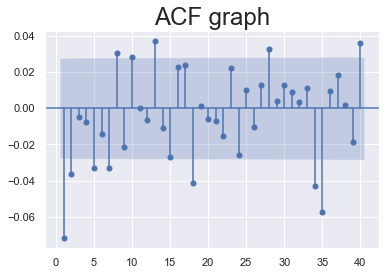

In [123]:
plot_acf_graph(df.norm_ret,False,40)

## Normalizing the input data does not affect the model selection. 

In [124]:
model_norm_ret_ma_8 = ARMA(df.norm_ret[1:],order=(0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                     ARMA(0, 8)   Log Likelihood              -30495.320
Method:                       css-mle   S.D. of innovations            105.323
Date:                Thu, 04 Nov 2021   AIC                          61010.640
Time:                        13:10:10   BIC                          61075.850
Sample:                    01-11-1994   HQIC                         61033.491
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7091      1.214      2.232      0.026       0.330       5.088
ma.L1.norm_ret    -0.0753      0.014     -5.334      0.000      -0.103      -0.048
ma.L2.norm_ret    -0.0416      0.014     -2.933      0.003      -0.069      -0.014
ma.L3.norm_ret    -0.0054      0.014     -0.381      0.703      -0.033       0.022
ma.L4.norm_ret    -0.0115      0.014     -0.810      0.418      -0.039       0.016
ma.L5.norm_ret    -0.0359      0.014     -2.613      0.009      -0.063      -0.009
ma.L6.norm_ret    -0.0121      0.014     -0.849      0.396      -0.040       0.016
ma.L7.norm_ret    -0.0311      0.014     -2.157      0.031      -0.059      -0.003
ma.L8.norm_ret     0.0293      0.014      2.121      0.034       0.002       0.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3315           -0.6022j            1.4613           -0.4324
MA.2           -1.3315           +0.6022j            1.4613            0.4324
MA.3           -0.5161           -1.4571j            1.5458           -0.3042
MA.4           -0.5161           +1.4571j            1.5458            0.3042
MA.5            0.6929           -1.3375j            1.5063           -0.1739
MA.6            0.6929           +1.3375j            1.5063            0.1739
MA.7            1.6848           -0.3284j            1.7165           -0.0306
MA.8            1.6848           +0.3284j            1.7165            0.0306
-----------------------------------------------------------------------------
"""

In [125]:
df['res_norm_ret_ma_8'] = results_norm_ret_ma_8.resid[1:]


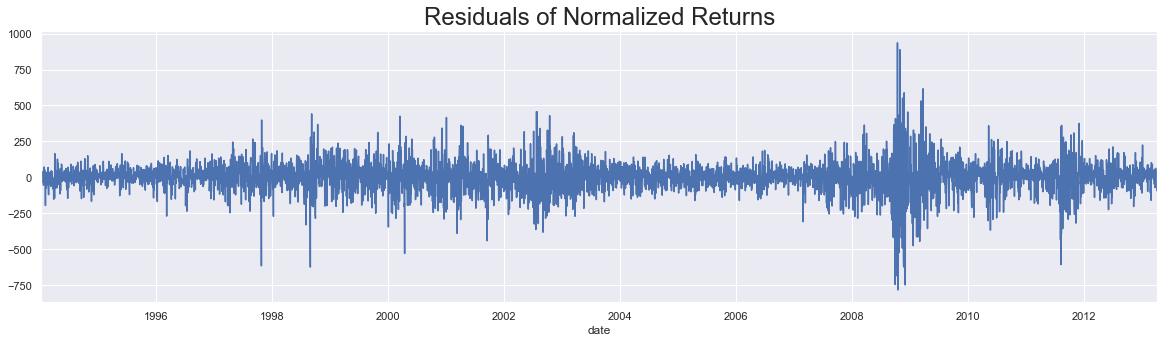

In [126]:
df.res_norm_ret_ma_8[1:].plot(figsize = (20,5))
plt.title('Residuals of Normalized Returns',size = 24)
plt.show()

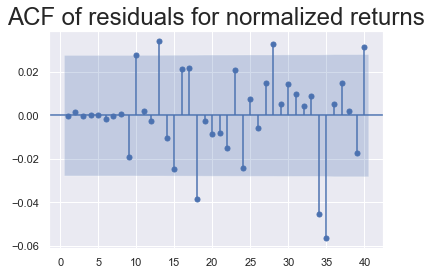

In [127]:
sgt.plot_acf(df.rest_ret_ma_8[2:],zero = False,lags=40)
plt.title('ACF of residuals for normalized returns',size = 24)
plt.show()

## The last examples were using returns. Lets see how the MA model performs with non stationary data such as the prices. 

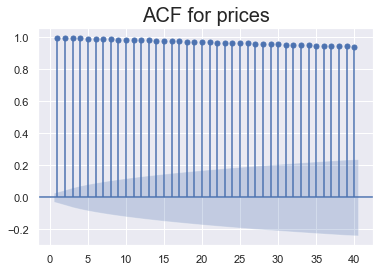

In [128]:
sgt.plot_acf(df.market_value,zero = False,lags=40)
plt.title('ACF for prices',size = 20)
plt.show()

## Every MA(t+1) model will be better than the MA(t) so it will takes us to MA(inf). This said no MA model would be a good estimator for prices. 


## So when the coefficients don't seem to die off, we should use a model with an AR component. 

# **ARMA**

## We include past  period errors in our predictions. This resulted in correct predictions but the residuals $\varepsilon_{t}$ didn't resemble white noise. So neither AR, MA are sufficient to predict future price returns. 

## The AR model make good predictions but failed to adjust quickly to shocks or unexpected situations. This can be solved accounting for the residual values, since the MA aspects smooth out the predictions. 


## The MA model account only for the residuals. These model needed a baseline to perform well. We can use present values to provide that baseline. 

## We can make a model which takes in count past values and past erros. 


## ARMA(p,q) = ARMA(1,1) states that we want to account 1 lagged value and 1 lagged error for the model. So here we are considering the autoregressive and moving average models. This model takes in count not only our results but how far off our predictions were. This allows us to calibrate our expectations on the go without waiting for the markets to calibrate naturally.  

In [129]:
model_ret_arma_1 = ARMA(df.returns[1:],order=(1,1))
results_arma_1 = model_ret_arma_1.fit()
results_arma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 1)   Log Likelihood               -8059.092
Method:                       css-mle   S.D. of innovations              1.205
Date:                Thu, 04 Nov 2021   AIC                          16126.183
Time:                        13:10:15   BIC                          16152.267
Sample:                    01-11-1994   HQIC                         16135.324
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0310      0.014      2.223      0.026       0.004       0.058
ar.L1.returns     0.6107      0.100      6.105      0.000       0.415       0.807
ma.L1.returns    -0.6814      0.093     -7.362      0.000      -0.863      -0.500
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6375           +0.0000j            1.6375            0.0000
MA.1            1.4676           +0.0000j            1.4676            0.0000
-----------------------------------------------------------------------------
"""

## The ar coefficient is possitive. This suggest there is a positive tendency between past and present values. Returns move in trends of consecutive positive or negative values. This translated in periods of persistent increase or decreases when translated to prices. 

## The ma coefficient is negative. This suggest that we shoud be moving away from the past period (t-1) values.  These past error terms ensure we don't get a 'Fool in the shower' type of error.  We want to prevent our targets from moving before we've accounted for them. 





In [130]:
model_ret_arma_4 = ARMA(df.returns[1:],order=(4,4))
results_arma_4 = model_ret_arma_4.fit()

In [131]:
results_arma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(4, 4)   Log Likelihood               -8054.329
Method:                       css-mle   S.D. of innovations              1.204
Date:                Thu, 04 Nov 2021   AIC                          16128.658
Time:                        13:10:24   BIC                          16193.868
Sample:                    01-11-1994   HQIC                         16151.509
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0310      0.014      2.257      0.024       0.004       0.058
ar.L1.returns     0.2719      0.143      1.899      0.058      -0.009       0.552
ar.L2.returns    -0.2214      0.128     -1.733      0.083      -0.472       0.029
ar.L3.returns    -0.4330      0.143     -3.025      0.002      -0.714      -0.152
ar.L4.returns     0.5608      0.087      6.410      0.000       0.389       0.732
ma.L1.returns    -0.3518      0.142     -2.470      0.013      -0.631      -0.073
ma.L2.returns     0.2115      0.133      1.586      0.113      -0.050       0.473
ma.L3.returns     0.4060      0.150      2.709      0.007       0.112       0.700
ma.L4.returns    -0.6025      0.088     -6.847      0.000      -0.775      -0.430
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1421           -0.0000j            1.1421           -0.5000
AR.2            0.2442           -1.0175j            1.0464           -0.2125
AR.3            0.2442           +1.0175j            1.0464            0.2125
AR.4            1.4258           -0.0000j            1.4258           -0.0000
MA.1           -1.1529           -0.0000j            1.1529           -0.5000
MA.2            0.2520           -1.0123j            1.0432           -0.2112
MA.3            0.2520           +1.0123j            1.0432            0.2112
MA.4            1.3227           -0.0000j            1.3227           -0.0000
-----------------------------------------------------------------------------
"""

## We look for a high likelihood and a low information criteria. 

In [132]:
print("LLR test:"+  str(LLR_test(model_ret_arma_1,model_ret_arma_4,DF = 6))) # we set the degrees of freedom to 6 because the ARMA(4,4) estimates 8 coefficients and the ARMA(1,1) estimates 2 coefficients so the difference is 6. 

LLR test:0.146


## 2 models of interest. 

### ARMA (P1,Q1)  ARMA(P2,Q2)

### The ARMA(P2,Q2) is nested if:

### 1) P1+Q1 > P2 + Q2

### 2) P1 >= P2

### 3) Q1 >= Q2 

## If two models have the same degrees of freedom ARMA(1,5) and ARMA(5,1), we can´t apply the LLR test. So we have to compare using the log likelihood and AIC from the summary table. 

In [133]:
df['res_ret_arma_4'] = results_arma_4.resid

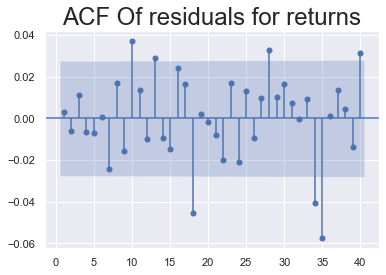

In [134]:
sgt.plot_acf(df.res_ret_arma_4[1:],zero=False,lags = 40)
plt.title('ACF Of residuals for returns', size = 24)
plt.show()

## Most of the first 10  residuals are not significant, so we can say they are random that is what we were looking for.

## If we try to add more lags this will predespose the model to failure when facing unfamiliar data. 

## If we feed more lags it will help us know with confidence how this specific dataset moves rather than understand how the actual market returns fluctuate. 

## The further back in time we go, the less relevant the values are. 

## ARMA in non stationary data. 

In [135]:
model_ar_1_ma_1 = ARMA(df.market_value,order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -20080.831
Method:                       css-mle   S.D. of innovations             13.204
Date:                Thu, 04 Nov 2021   AIC                          40169.662
Time:                        13:10:38   BIC                          40195.747
Sample:                    01-10-1994   HQIC                         40178.803
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1053.6298    250.960      4.198      0.000     561.757    1545.502
ar.L1.market_value     0.9995      0.000   2171.168      0.000       0.999       1.000
ma.L1.market_value    -0.0744      0.015     -5.105      0.000      -0.103      -0.046
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
MA.1           13.4347           +0.0000j           13.4347            0.0000
-----------------------------------------------------------------------------
"""

In [136]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid


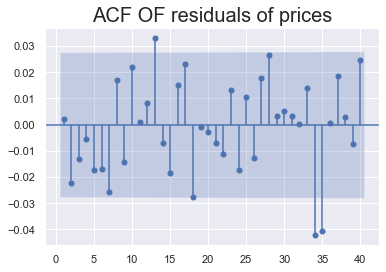

In [137]:
sgt.plot_acf(df.res_ar_1_ma_1,zero=False,lags = 40)
plt.title('ACF OF residuals of prices',size = 20)
plt.show()

In [138]:
model_ar_1_ma_1 = ARMA(df.market_value,order=(6,6))
results_ar_1_ma_1 = model_ar_1_ma_1.fit(start_ar_lags=11)# this number must be greater than the ar number in the order parameter in the definition of the ARMA model. 
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5020
Model:                     ARMA(6, 6)   Log Likelihood              -20063.792
Method:                       css-mle   S.D. of innovations             13.156
Date:                Thu, 04 Nov 2021   AIC                          40155.585
Time:                        13:11:18   BIC                          40246.881
Sample:                    01-10-1994   HQIC                         40187.576
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1091.7813    146.777      7.438      0.000     804.104    1379.459
ar.L1.market_value     1.2121      0.026     46.818      0.000       1.161       1.263
ar.L2.market_value     0.9980      0.023     42.482      0.000       0.952       1.044
ar.L3.market_value    -1.3822      0.033    -42.211      0.000      -1.446      -1.318
ar.L4.market_value    -0.8081      0.029    -27.731      0.000      -0.865      -0.751
ar.L5.market_value     1.1717      0.025     47.065      0.000       1.123       1.220
ar.L6.market_value    -0.1919      0.023     -8.461      0.000      -0.236      -0.147
ma.L1.market_value    -0.2892      0.030     -9.786      0.000      -0.347      -0.231
ma.L2.market_value    -1.2292      0.023    -53.177      0.000      -1.275      -1.184
ma.L3.market_value     0.2563      0.033      7.725      0.000       0.191       0.321
ma.L4.market_value     0.9953      0.026     38.032      0.000       0.944       1.047
ma.L5.market_value    -0.2652      0.027     -9.887      0.000      -0.318      -0.213
ma.L6.market_value    -0.0094      0.015     -0.641      0.521      -0.038       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8893           -0.4588j            1.0007           -0.4242
AR.2           -0.8893           +0.4588j            1.0007            0.4242
AR.3            0.9247           -0.4216j            1.0163           -0.0681
AR.4            0.9247           +0.4216j            1.0163            0.0681
AR.5            1.0009           -0.0000j            1.0009           -0.0000
AR.6            5.0341           -0.0000j            5.0341           -0.0000
MA.1           -0.8890           -0.4578j            1.0000           -0.4243
MA.2           -0.8890           +0.4578j            1.0000            0.4243
MA.3            0.9319           -0.4154j            1.0203           -0.0667
MA.4            0.9319           +0.4154j            1.0203            0.0667
MA.5            3.2406           -0.0000j            3.2406           -0.0000
MA.6          -31.5905           -0.0000j           31.5905           -0.5000
-----------------------------------------------------------------------------
"""

## ARIMA model can handle non stationary data. 

## The I in the arima states for integrated which accounts for the number of non-seasonal differences we need to examine to establish stationarity. This models targets the difference between the values  in period t and the one preceding it. Estimates the jumps between prices rather than the prices. Models the difference from one period to another. 

## Transforming prices into returns is a form of brute integration. 

## An ARIMA model has 3 orders (p,d,q) 

## P : AR , D : I , Q: MA
## d represents the integration (I) which is the number of times we need to integrate the time-series to ensure stationarity. 


##  The equation for an ARIMA(1,1,1) for prices P  is :

## $\Delta P_{t} = c + \varphi_{1} P_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$


## $\Delta P_{t} = P_{t}-P_{t-1}$

## The ARIMA model is just an ARMA(p,q) model for a newly generated time-series. 





# **Seasonality (SARIMAX)** 

## SARIMAX (p,d,q)(P,D,Q,s) 

### The (P,Q,D) are just seasonal variations of the ARIMA models. 

### upper case P : seasonal autoregressive order. 

### upper case D : seasonal integration order. 

### upper case Q : seasonal moving average order. 

### s: lenght of the cycle or season which can be explained us the number of periods (hourly, daily, yearly)  needed to pass before the tendency reappears. 




# SARIMAX(1,0,2)(2,0,1,5) 

##  We are including the lag values from 5 and 10 periods ago as well as the error term from 5 periods ago. 

##  $\phi_{1}$ $y_{t-5} $

##  $\phi_{2}$  $y_{t-10}$ 

##  $\theta_{1}$ $\varepsilon_{t-5}$ 


## We are interested in every 's'-th value from s to (sxP) in this case  (s = 5 x P = 2) = (10)

In [139]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## **Volatity** is related to the magnitude of the residuals. It doesn't care if they are positive or negative we are only consider how off our predictions are. 

## Volatility is associated with variance, so lower variance results in stability and therefore a low risk. 

## How we disregard the difference between possitive and negative signs. By squaring the values we can make this. Also, squaring the values penalizes high differences between true values and predictions more.  This  increases the importance of big unpredicted shocks. 

# **ARCH** model

## Autoregressive conditional heteroskedasticity model. 

## It has two equations one for the mean and one for the variance.

## In order to measure unexpected shocks we need some norm or baseline that we set with the first equation. 

## Conditional states that a value depends on other. 

## Heteroskedasticity means different dispersion. We can measure dispersion with variance and standard deviation. 

## So conditional heteroskedasticity means that the variance will depend on other values. This values are the past values.

### $Var(y_{t}|y_{t-1}) = \alpha_{0} + \alpha_{1} * {\varepsilon_{t-1}}^{2}$

### $Var(y_{t}|y_{t-1})$ : conditional variance that depends on past lags.

### $\alpha_{0}$ : constant factor.

### $\alpha_{1}$ : coefficient associated with the first term. 

### ${\varepsilon_{t-1}}^{2}$ : squared value of the residual epsilon for the previous period. 

### $Var(y_{t}|y_{t-1}) = \sigma _{t}^{2} $

### ARCH (q) : the number of previous values we include in the model. 

## **Volatility** : numeric measurement of unvertainty. It depends in the volume of changes in valuation.  Valuations are just the prices or returns of the portafolios, market indices or securities. 

## **Volatility** is not directly observable it evolves continuosly and doesn't go off to infinity. 

## We are always looking for stability. 

## $r_{t} = \mu_{t} + \varepsilon_{t}$

### $\varepsilon_{t}$ : The residuals left after estimating the coefficients. 

### $\mu_{t}$ : The mean is a time series. It can be a function of past values and past errors. It can be modeled by an armax model. 

### The mean is modeled as $\mu_{t} = C + \varphi_{1} \mu_{t-1} + ...$

### The mean is serially uncorrelated which means it has no time dependent patterns. 




## The arch models first fit the mean equation to the data and estimates the residuals $ \varepsilon_{t}$ :

##  $r_{t} = C_{0} + \varphi_{1} \mu_{t-1} + \varepsilon_{t}$

## After this, it measures the conditional variance. 

## $Var(y_{t}|y_{t-1}) = \alpha_{0} + \alpha_{1} * {\varepsilon_{t-1}}^{2}$

In [140]:
df['sq_returns'] = df.returns.mul(df.returns)

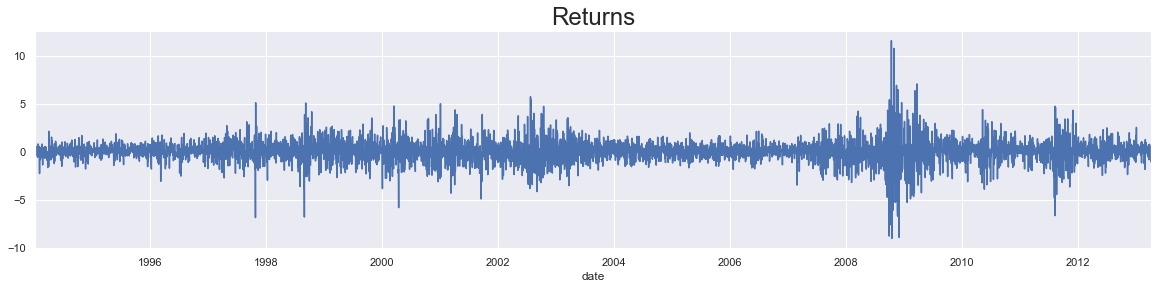

In [141]:
df.returns.plot(figsize = (20,4))
plt.title('Returns',size = 24)
plt.show()

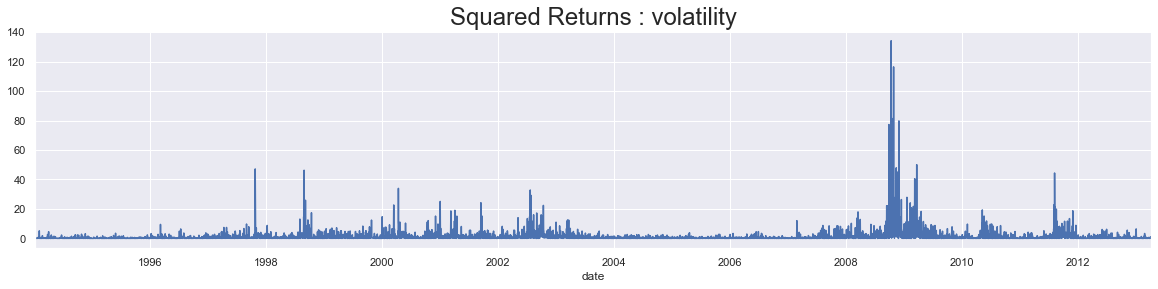

In [142]:
df.sq_returns.plot(figsize = (20,4))
plt.title('Squared Returns : volatility',size = 24)
plt.show()

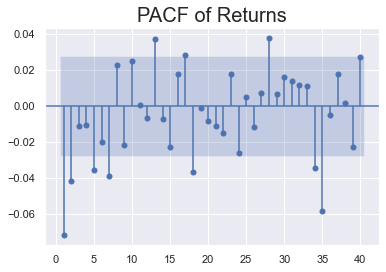

In [143]:
sgt.plot_pacf(df.returns[1:],lags=40,alpha = 0.05 ,zero = False , method = 'ols')
plt.title('PACF of Returns',size = 20)
plt.show()

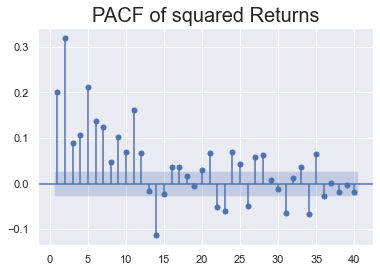

In [144]:
sgt.plot_pacf(df.sq_returns[1:],lags=40,alpha = 0.05 ,zero = False , method = 'ols')
plt.title('PACF of squared Returns',size = 20)
plt.show()

## This high significance in the first lags suggest that they tend to be short-term trends in variance. 

## Clustering: There are periods of high variation follow by periods of high variation and periods of low variation follow by periods of low variation. 

In [145]:
from arch import arch_model

In [146]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7575947494.281847
Iteration:      2,   Func. Count:     15,   Neg. LLF: 447474883.76178813
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7050.942087325888
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7345.8719295736655
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7046.9577521152505
Iteration:      6,   Func. Count:     41,   Neg. LLF: 7003.50405278968
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7076.211482276614
Iteration:      8,   Func. Count:     53,   Neg. LLF: 7003.411146136501
Iteration:      9,   Func. Count:     59,   Neg. LLF: 7002.531960050153
Iteration:     10,   Func. Count:     65,   Neg. LLF: 6999.320885228499
Iteration:     11,   Func. Count:     70,   Neg. LLF: 6999.320852304308
Iteration:     12,   Func. Count:     74,   Neg. LLF: 6999.320852301972
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6999.320852304308
            Iterations: 12

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6999.32
Distribution:                  Normal   AIC:                           14006.6
Method:            Maximum Likelihood   BIC:                           14032.7
                                        No. Observations:                 5019
Date:                Thu, Nov 04 2021   Df Residuals:                     5018
Time:                        13:11:44   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0601  1.177e-02      5.111  3.206e-07 [3.708e-02,8.322e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0111  3.414e-03      3.255  1.133e-03 [4.422e-03,1.780e-02]
alpha[1]       0.0781  1.013e-02      7.712  1.240e-14 [5.826e-02,9.796e-02]
beta[1]        0.9145  1.043e-02     87.714      0.000     [  0.894,  0.935]
============================================================================

Covariance estimator: robust
"""

## In the summary table it says Distribution : Normal. This states that the residuals follows a normal distribution. 

## DF model : indicates the number of coefficients we are trying to estimate. 

## Mean Model : t is large so it states that the mean is significant. 

## The mean of the series is not serially correlated.

## The mean equation is time invariant. 

## Neither past values, nor past residuals. 

In [147]:
model_arch_1 = arch_model(df.returns[1:],mean = 'Constant', vol = 'ARCH', p= 1)
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 35965.8593793213
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2116236.536812327
Iteration:      3,   Func. Count:     19,   Neg. LLF: 8204.630535735687
Iteration:      4,   Func. Count:     25,   Neg. LLF: 7846.516294593173
Iteration:      5,   Func. Count:     29,   Neg. LLF: 7846.516200042948
Iteration:      6,   Func. Count:     32,   Neg. LLF: 7846.516200042388
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7846.516200042948
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7846.52
Distribution:                  Normal   AIC:                           15699.0
Method:            Maximum Likelihood   BIC:                           15718.6
                                        No. Observations:                 5019
Date:                Thu, Nov 04 2021   Df Residuals:                     5018
Time:                        14:06:14   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0478  1.808e-02      2.642  8.231e-03 [1.234e-02,8.320e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.0737  5.701e-02     18.834  3.962e-79 [  0.962,  1.185]
alpha[1]       0.2779  4.848e-02      5.732  9.897e-09 [  0.183,  0.373]
========================================================================

Covariance estimator: robust
"""

## We have 2 summary tables oen for the mean equation which is the mean model and one for the variance equation which is the volatility model. 

## Omega in the volatility model refers to $\alpha_{0}$ in the variance equation. 

## If the residuals are simply a version of the original data set, where every value is decreased by a constant, then there will be no actual variance, hence the is nothing to explain so the R-squared = 0. 

# **ARCH CAN ONLY BE USED TO PREDICT FUTURE VARIANCE RATHER THAN FUTURE RETURNS.**

## **Higher lag ARCH Models.**

### ARCH(2)

In [148]:
model_arch_2 = arch_model(df.returns[1:],mean = 'Constant', vol = 'ARCH', p= 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 7623.844016254787
Iteration:     10,   Func. Count:     63,   Neg. LLF: 7538.86787792175
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7538.86787792175
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7538.87
Distribution:                  Normal   AIC:                           15085.7
Method:            Maximum Likelihood   BIC:                           15111.8
                                        No. Observations:                 5019
Date:                Thu, Nov 04 2021   Df Residuals:                     5018
Time:                        14:18:11   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0628  1.565e-02      4.015  5.950e-05 [3.215e-02,9.348e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.7412  4.384e-02     16.907  3.994e-64 [  0.655,  0.827]
alpha[1]       0.1705  2.914e-02      5.850  4.908e-09 [  0.113,  0.228]
alpha[2]       0.3239  4.288e-02      7.553  4.240e-14 [  0.240,  0.408]
========================================================================

Covariance estimator: robust
"""

## The more past squared residuals we take into account, the less important each additional one becomes. 

In [149]:
model_arch_13 = arch_model(df.returns[1:],mean = 'Constant', vol = 'ARCH', p= 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     90,   Neg. LLF: 8479.897853749208
Iteration:     10,   Func. Count:    180,   Neg. LLF: 7846.799192868806
Iteration:     15,   Func. Count:    270,   Neg. LLF: 7270.941828112662
Iteration:     20,   Func. Count:    359,   Neg. LLF: 7059.46694778283
Iteration:     25,   Func. Count:    446,   Neg. LLF: 6998.871677420262
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6998.871295361447
            Iterations: 28
            Function evaluations: 493
            Gradient evaluations: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6998.87
Distribution:                  Normal   AIC:                           14027.7
Method:            Maximum Likelihood   BIC:                           14125.6
                                        No. Observations:                 5019
Date:                Thu, Nov 04 2021   Df Residuals:                     5018
Time:                        14:20:56   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0590  1.230e-02      4.800  1.583e-06 [3.493e-02,8.314e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1831  2.460e-02      7.445  9.694e-14      [  0.135,  0.231]
alpha[1]       0.0280  1.412e-02      1.982  4.749e-02  [3.096e-04,5.566e-02]
alpha[2]       0.1289  2.659e-02      4.849  1.239e-06    [7.683e-02,  0.181]
alpha[3]       0.0631  1.638e-02      3.851  1.175e-04  [3.097e-02,9.517e-02]
alpha[4]       0.0883  2.202e-02      4.011  6.044e-05    [4.517e-02,  0.131]
alpha[5]       0.0804  1.930e-02      4.168  3.074e-05    [4.261e-02,  0.118]
alpha[6]       0.0619  1.679e-02      3.684  2.296e-04  [2.895e-02,9.476e-02]
alpha[7]       0.1096  2.530e-02      4.331  1.486e-05    [5.998e-02,  0.159]
alpha[8]       0.0449  2.174e-02      2.067  3.871e-02  [2.333e-03,8.756e-02]
alpha[9]       0.0692  2.080e-02      3.327  8.776e-04    [2.844e-02,  0.110]
alpha[10]      0.0951  2.198e-02      4.328  1.503e-05    [5.205e-02,  0.138]
alpha[11]      0.0456  1.787e-02      2.552  1.073e-02  [1.057e-02,8.064e-02]
alpha[12]      0.0338  1.843e-02      1.832  6.695e-02 [-2.359e-03,6.990e-02]
alpha[13]      0.0415  1.767e-02      2.348  1.886e-02  [6.860e-03,7.612e-02]
=============================================================================

Covariance estimator: robust
"""

# **GARCH MODEL**

## We can improve ARCH model including past values as well. 

## We can add past conditional variance ${\sigma_{t-1}^2}$ to the model. This is applied to the volatility or variance model. They are the same. 


## This is because periods of high volatility are follow by periods of high volatility and periods of low volatility are followed by periods of low volatility.  This is called as volatility cluster. Referred as a benchmark. 

## Returns can go up and down from one period to the next while volatility is continuous and dont behave like that.

## This is the GARCH (Generalized Autoregressive Conditional Heteroskedasticity Model)

## $ Var(y_{t}|y_{t-1})$ = $\Omega + \alpha_{1}{\varepsilon_{t-1}^2} +  \beta_{1}{\sigma_{t-1}^2}$ 

## $ Var(y_{t}|y_{t-1})$  : The variance today is conditional on the values of the variable yesterday. 

## $\Omega$ : constant. 

## ${\varepsilon_{t-1}^2}$ : squared residual for the past period. 


## ${\sigma_{t-1}^2}$ : conditional variance for last period. 



## GARCH model has two orders (1,1) : the first is the past residuals (ARCH ORDER) and the second one the past conditional variances (GARCH ORDER). 

##  The GARCH component is equivalent to the AR component

## The ARCH component express squared residuals and the MA component express past errors. 

## GARCH(1,1) model with serially uncorrelated data.

## This means that the model doesn't rely on past values or errors. It is a constant mean model.  

In [150]:
model_garch_1_1 = arch_model(df.returns[1:],mean= 'Constant', vol = 'GARCH', p = 1, q = 1 )
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)# to avoid display unnecesary values on the screen. 
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 7046.9577521152505
Iteration:     10,   Func. Count:     65,   Neg. LLF: 6999.320885228499
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6999.320852304308
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6999.32
Distribution:                  Normal   AIC:                           14006.6
Method:            Maximum Likelihood   BIC:                           14032.7
                                        No. Observations:                 5019
Date:                Thu, Nov 04 2021   Df Residuals:                     5018
Time:                        15:08:10   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0601  1.177e-02      5.111  3.206e-07 [3.708e-02,8.322e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0111  3.414e-03      3.255  1.133e-03 [4.422e-03,1.780e-02]
alpha[1]       0.0781  1.013e-02      7.712  1.240e-14 [5.826e-02,9.796e-02]
beta[1]        0.9145  1.043e-02     87.714      0.000     [  0.894,  0.935]
============================================================================

Covariance estimator: robust
"""

## The higher likelihood of this model compared with the simple ARCH is because here we include past values (variances).  

## No higher order GARCH models outperform the GARCH(1,1) when it comes to variance of market returns. This is because all the effects of the conditional variance 2 days ago will be containded in the conditional variance of yesterday. 

## No need to include more than 1 GARCH component. 

## arch_model(p : arch order , q : garch order) This is because in the equation the ARCH model came first than the GARCH model. 

## GARCH (1,2)

In [151]:
model_garch_1_2 = arch_model(df.returns[1:],mean= 'Constant', vol = 'GARCH', p = 1, q = 2 )
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)# to avoid display unnecesary values on the screen. 
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 7016.68169278707
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6999.327219647346
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6999.320852078057
            Iterations: 14
            Function evaluations: 96
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6999.32
Distribution:                  Normal   AIC:                           14008.6
Method:            Maximum Likelihood   BIC:                           14041.2
                                        No. Observations:                 5019
Date:                Thu, Nov 04 2021   Df Residuals:                     5018
Time:                        15:18:25   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0601  1.178e-02      5.108  3.257e-07 [3.707e-02,8.323e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0111  3.217e-03      3.454  5.524e-04 [4.807e-03,1.742e-02]
alpha[1]       0.0781  8.733e-03      8.943  3.790e-19 [6.098e-02,9.522e-02]
beta[1]        0.9145      0.136      6.704  2.028e-11     [  0.647,  1.182]
beta[2]        0.0000      0.134      0.000      1.000     [ -0.262,  0.262]
============================================================================

Covariance estimator: robust
"""

## The p-value for beta 2 is 1 which states that there is a perfect collinearity. This is that all the explanatory power of the conditional variance two periods ago is already captured by the variance from last period. 

# **AUTO ARIMA**

In [160]:
from pmd.autorima import autorima

ModuleNotFoundError: No module named 'pmd'